In [1]:
%matplotlib inline
import sys
sys.path.append('../../')
import numpy as np
import matplotlib.pyplot as plt
from modules.db_manager import open_file, product_info
from modules.factory import get_tdop_array 

### 0. Load data

In [2]:
products = product_info() #종목정보
raw_daily = open_file('h5py','raw data/daily_futures.h5') #daily futures
raw_density = open_file('tb','etc/density_table.hdf5', mode='r') #density table

### 1. Generate Historcal TDOP 

In [39]:
file = open_file('h5py', 'etc/historical_TDOP.h5', mode='w', force=True)

In [40]:
length = len(raw_density.list_nodes('/'))
for cnt, grp in enumerate(raw_density.iter_nodes('/')):
    code = grp._v_name
    print('\r processing: %s (%s/%s)                             '%(code,cnt,length), end='', flush=True)
    info = products[code]
    start = grp.DateMapper.read(field='date').min().astype('M8[s]')
    end = grp.DateMapper.read(field='date').max().astype('M8[s]')
    daterng = np.arange(start, end, dtype='datetime64[D]')
    
    dates = []
    prices = []
    tdop = []
    for now in daterng:
        print(f"\rprocessing: {code} at {now} ({cnt}/{length})                        ", end='', flush=True)
        x, y, date = get_tdop_array(grp, info, now)
        dates.append(date)
        tdop.append(y)
    dates = np.array(dates).astype('int64')
    prices = np.array(x)
    tdop = np.array(tdop)
    
    group = file.create_group(code)
    group.create_dataset("dates", dates.shape, data=dates)
    group.create_dataset("prices", prices.shape, data=prices)
    group.create_dataset("tdop", tdop.shape, data=tdop, compression="gzip")

processing: ZW at 2014-12-30 (44/45)                          

In [41]:
file.close()

### Verification

In [42]:
file = open_file('h5py', 'etc/historical_TDOP.h5', mode='r')

In [49]:
a=file['URO/tdop'].value

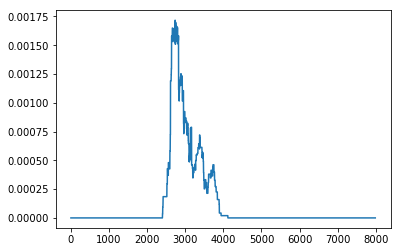

In [52]:
plt.plot(a[100])

In [53]:
file.close()

In [55]:
for gp in raw_density.iter_nodes('/'):
    print(gp._v_name)

AD
BP
CC
CD
CL
CT
DX
ED
FBTP
FDAX
FESX
FGBL
FGBM
FGBS
GC
HG
HO
JY
KC
LC
LCO
LGO
LH
NE
NG
NKD
OJ
PA
PL
SB
SF
SI
URO
WTCL
ZB
ZC
ZF
ZL
ZM
ZN
ZO
ZR
ZS
ZT
ZW
